<a href="https://colab.research.google.com/github/profcintiapinho/laboratorio_ia/blob/main/9__Analise_de_Dados_Campanha_de_Marketing_de_um_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testando Base de um Banco para identificar efetividade de uma campanha de marketing por telefone

## Artigo escrito após este trabalho
Perfil no Researchgate.net:
https://www.researchgate.net/profile/Cintia-Maria-Pinho

Artigo na Revista:
https://rsdjournal.org/index.php/rsd/article/view/10491

## Bibliotecas Necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# algoritmos de classificação
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#esse código permite ter acesso ao aquivo que está dentro do Drive
from google.colab import drive
drive.mount('/content/drive')
#esse código pega o arquivo disponível no github

Mounted at /content/drive


In [ ]:
#cópia para baixar a base de dados e colocar no seu colab
#https://drive.google.com/file/d/1CMqyN9LImHG1qa1oLF9awtUj5RzijdfG/view?usp=sharing

In [ ]:
# subindo base de dadps
bank=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laboratório de IA/cienciasdeDAdos/bank.csv')
bank.head()
#Pegando Base do Github
#Caso não salve essa base de dados no seu Drive, deverá usar o código abaixo.
#bank = pd.read_csv('https://raw.githubusercontent.com/profcintiapinho/laboratorio_ia/main/bank.csv') 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Summay of data

### Categorical Variables :
**[1] job (TRABALHO)    :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital (ESTADO CIVIL)  :** married, single, divorced
<br>**[3] education (NIVEL ESCOLAR):** secondary, tertiary, primary, unknown
<br>**[4] default(TEM CRÉDITO ATUALMENTE)  :** yes, no
<br>**[5] housing (EMPRÉSTIMO HABITACIONAL)  :** yes, no
<br>**[6] loan (EMPRÉSTIMO PESSOAL)    :** yes, no 
<br>**[7] deposit (ASSINOU CONTRATO DE INVESTIMENTO?)  :** yes, no ** (VARIÁVEL PREDITORA)**
<br>**[8] contact (TIPO DE COMUNICAÇÃO) :** unknown, cellular, telephone
<br>**[9] month (ULTIMO MES DO CONTATO)    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome (RESULTADO DA CAMPANHA ANTERIOR):** unknown, other, failure, success

### Numerical Variables:
**[1] age (IDADE)
<br>[2] balance (SALDO BANCÁRIO)
<br>[3] day (ULTIMO DIA DE CONTATO)
<br>[4] duration(DURAÇÃO EM DO CONTATO)
<br>[5] campaign (QUANTOS CONTATOS DURANTE A CAMPANHA)
<br>[6] pdays (QUANTOS DIAS PASSARAM APÓS O CONTATO DE UMA CAMPANHA ANTERIOR)
<br>[7] previous ** (CONTATOS ANTES DA CAMPANHA)

# TRADUÇÃO

In [ ]:
# verificando valores nulos
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
disseram_sim = bank.loc[bank['deposit']=='yes']
disseram_nao = bank.loc[bank['deposit']=='no']

In [ ]:
disseram_sim

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,8,apr,335,1,-1,0,unknown,yes
5285,30,management,single,tertiary,no,398,no,no,cellular,27,oct,102,1,180,3,success,yes
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,22,apr,138,2,-1,0,unknown,yes
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes


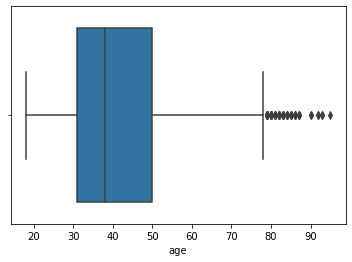

In [ ]:
# mostra a média de idade das pessoas que assinaram a carta de crédito
g = sns.boxplot(x=disseram_sim["age"])

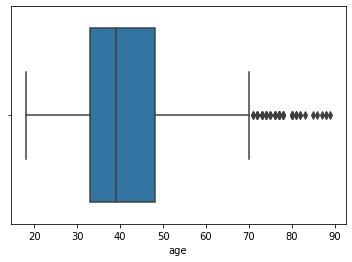

In [ ]:
# mostra a média de idade das pessoas que não assinaram a carta de crédito
g = sns.boxplot(x=disseram_nao["age"])

Text(0, 0.5, 'Frequencia')

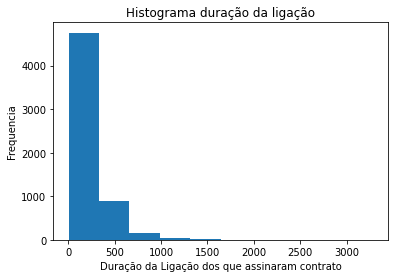

In [ ]:
disseram_nao.duration.plot.hist()
plt.title('Histograma duração da ligação')
plt.xlabel('Duração da Ligação dos que assinaram contrato')
plt.ylabel('Frequencia')

Text(0, 0.5, 'Frequencia')

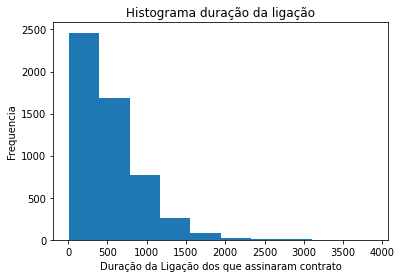

In [ ]:
disseram_sim.duration.plot.hist()
plt.title('Histograma duração da ligação')
plt.xlabel('Duração da Ligação dos que assinaram contrato')
plt.ylabel('Frequencia')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


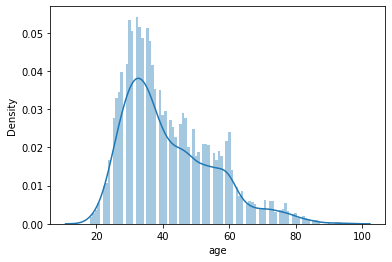

In [ ]:
# ainda distribuição de idades porém com outro gráfico
sns.distplot(disseram_sim.age, bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


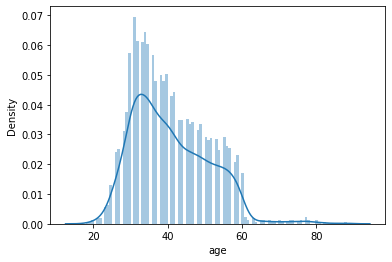

In [ ]:
# ainda distribuição de idades porém com outro gráfico
sns.distplot(disseram_nao.age, bins=100)

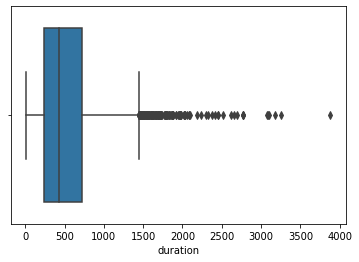

In [ ]:
# tempo de duração media que ficam no telefone escutando a proposta das pessoas que disseram sim
g = sns.boxplot(x=disseram_sim["duration"])

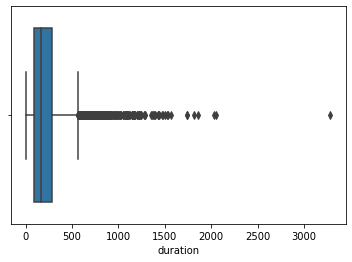

In [ ]:
# tempo de duração media que ficam no telefone escutando a proposta das pessoas que disseram sim
g = sns.boxplot(x=disseram_nao["duration"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


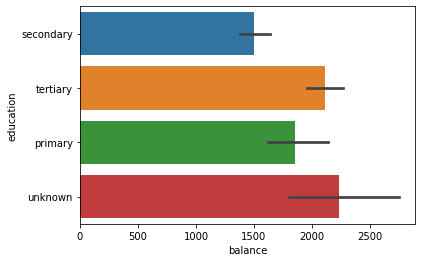

In [ ]:
#Relação entre entre saldo e nível de escolaridade dos clientes que assinaram contrato
sns.barplot(disseram_sim.balance,disseram_sim.education)

In [ ]:
disseram_sim.education.value_counts()

secondary    2450
tertiary     1996
primary       591
unknown       252
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


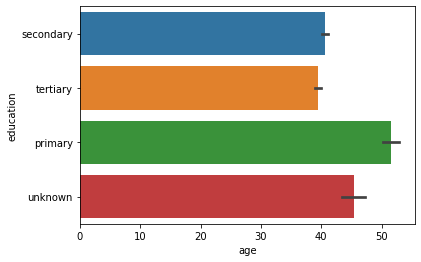

In [ ]:
#Relação entre entre idade e nível de escolaridade dos clientes que assinaram contrato
sns.barplot(disseram_sim.age,disseram_sim.education)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


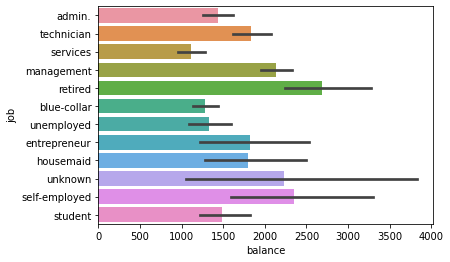

In [ ]:
#Relação dos Clientes que assinaram contrato (IdadeXTrabalho)
#Aqui a visualização dos dados não ficou tão legal, então o próximo passo é tratar a base de dados para além de prever os clientes que irão contratar os serviços, vamos diminuir aprender a generalizar melhor as informações da base de dados.
sns.barplot(disseram_sim.balance,disseram_sim.job)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


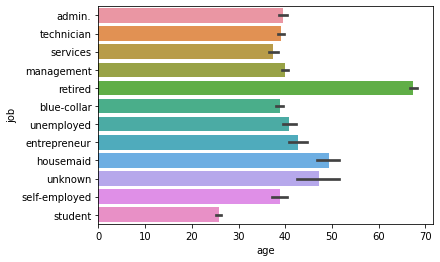

In [ ]:
#Relação entre Idade e em que as pessoas trabalham.
sns.barplot(disseram_sim.age,disseram_sim.job)

In [ ]:
#Aqui eu quero saber daqueles que disseram sim, quantos são casados, solterios ou divorciados
disseram_sim.marital.value_counts()


married     2755
single      1912
divorced     622
Name: marital, dtype: int64

In [ ]:
casados = disseram_sim.marital.value_counts()['married']
solteiros = disseram_sim.marital.value_counts()['single']
divorciados = disseram_sim.marital.value_counts()['divorced']

In [ ]:
y = [casados, solteiros, divorciados]
x = ["Casados","Solteiros","Divorciados"]

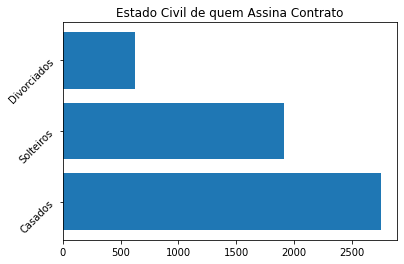

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Estado Civil de quem Assina Contrato')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Saldo Báncário de quam assina o contrato X Estado Civil')

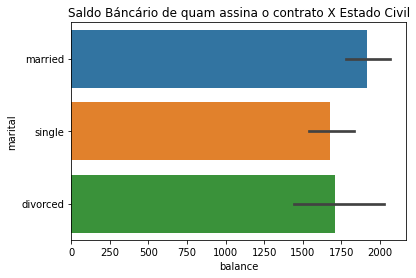

In [ ]:
#Saldo Bancário
sns.barplot(disseram_sim.balance,disseram_sim.marital)
plt.title('Saldo Báncário de quam assina o contrato X Estado Civil')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Saldo Báncário de quem NÃO assina o contrato X Estado Civil')

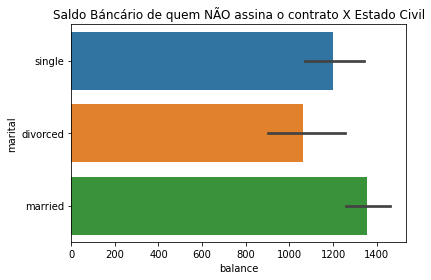

In [ ]:
#Saldo Bancário
sns.barplot(disseram_nao.balance,disseram_nao.marital)
plt.title('Saldo Báncário de quem NÃO assina o contrato X Estado Civil')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quem fica mais tempo escutando a proposta?')

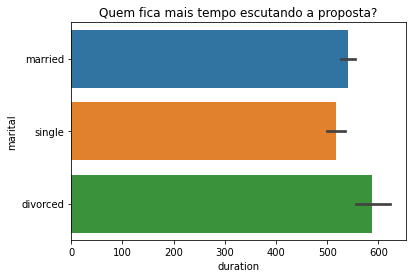

In [ ]:
sns.barplot(disseram_sim.duration,disseram_sim.marital)
plt.title('Quem fica mais tempo escutando a proposta?')

### Convertendo os dados para numeros para Fazer as previsões com Base no DataFrame





In [ ]:
# Fazendo um cópia para outros teste
bank_data = bank.copy()

In [ ]:
# As profissoes abaixo fizeram deposito, chegando a conclusão que as que mais fazem depósitos são da área de gestão
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [ ]:
# Aqui sem o condicional- só para entender quantos tem de cada profissão
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

##Agrupando dados do Dataframe

In [ ]:
#combinando os trabalhos similares em determidadas categorias
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'area-gestao')
bank_data['job'] = bank_data['job'].replace(['services','housemaid','entrepreneur'], 'setor-servicos')
bank_data['job'] = bank_data['job'].replace(['student', 'unemployed', 'unknown'], 'outros')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['blue-collar'], 'trabalho-manual')
bank_data['job'] = bank_data['job'].replace(['retired'], 'Aposentados')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['technician'], 'tecnicos')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['self-employed'], 'autonomos')

In [ ]:
# contagem após agrupamento
bank_data.job.value_counts()

area-gestao        3900
trabalho-manual    1944
tecnicos           1823
setor-servicos     1525
outros              787
Aposentados         778
autonomos           405
Name: job, dtype: int64

## Agrupando as informações de contratos aceitos na campanha anterior!

In [ ]:
#Fez contrato na campanha anterior?
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')

In [ ]:
# combinando os casos outros dentro de desconhecido também para diminuir os valores para avaliação
bank_data['poutcome'] = bank_data['poutcome'].replace(['failure'] , 'fracasso')
bank_data['poutcome'] = bank_data['poutcome'].replace(['success'] , 'sucesso')

In [ ]:
# combinando os casos outros dentro de desconhecido também para diminuir os valores para avaliação
bank_data['poutcome'] = bank_data['poutcome'].replace(['unknown'] , 'desconhecido')

In [ ]:
bank_data.poutcome.value_counts()

desconhecido    8863
fracasso        1228
sucesso         1071
Name: poutcome, dtype: int64

In [ ]:
# já que todos os clientes foram contatados não é necessário permanecer essa coluna
bank_data.drop('contact', axis=1, inplace=True)

## Todos os valores que eram Sim ou Não serão trocados para numéricos para facilitar a Classificação posterior

In [ ]:
# trocando os falores do default para 0 e 1
bank_data["default"]
bank_data['tem_credito'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [ ]:
# mesma coisa para housing
bank_data["emprestimo_hab"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [ ]:
# trocando loan para 0 e 1
bank_data["possui_emprestimo"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [ ]:
#vamos apagar esses dados pois não fazem muito sentido aqui
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [ ]:
# trocando "deposit"para 0 e 1
bank_data["assinou_contrato"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [ ]:
bank_data.job.value_counts()

area-gestao        3900
trabalho-manual    1944
tecnicos           1823
setor-servicos     1525
outros              787
Aposentados         778
autonomos           405
Name: job, dtype: int64

In [ ]:
jobs = ['area-gestao','trabalho-manual','tecnicos','outros','setor-servicos','autonomos','pequeno-empreendedor']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.assinou_contrato == 1) & (bank_data.job ==j)])))

area-gestao     :  1932
trabalho-manual :   708
tecnicos        :   840
outros          :   505
setor-servicos  :   601
autonomos       :   187
pequeno-empreendedor :     0


In [ ]:
list(bank_data)

['age',
 'job',
 'marital',
 'education',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'tem_credito',
 'emprestimo_hab',
 'possui_emprestimo',
 'assinou_contrato']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


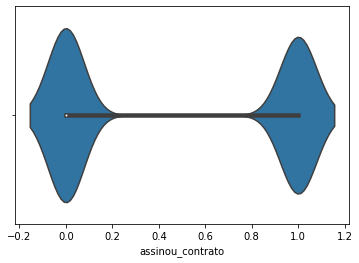

In [ ]:
#mostra que metade assinou contrato hue(ver)
sns.violinplot(bank_data['assinou_contrato'])

In [ ]:
disseram_sim2 = bank_data.loc[bank_data['assinou_contrato']==1]

In [ ]:
disseram_sim2.job.value_counts()

area-gestao        1932
tecnicos            840
trabalho-manual     708
setor-servicos      601
Aposentados         516
outros              505
autonomos           187
Name: job, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


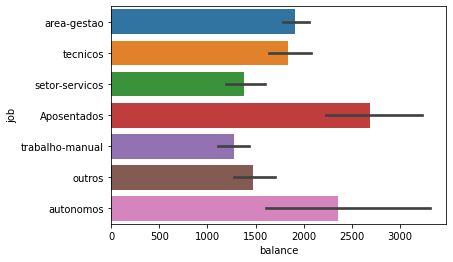

In [ ]:
sns.barplot(disseram_sim2.balance,disseram_sim2.job)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


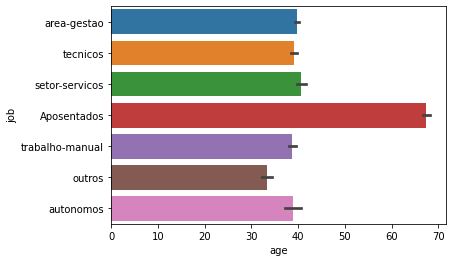

In [ ]:
sns.barplot(disseram_sim2.age,disseram_sim2.job)

In [ ]:
disseram_sim2.marital.value_counts()

married     2755
single      1912
divorced     622
Name: marital, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


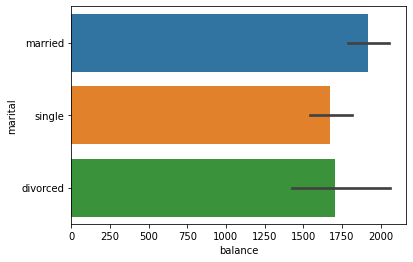

In [ ]:
sns.barplot(disseram_sim2.balance,disseram_sim2.marital)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


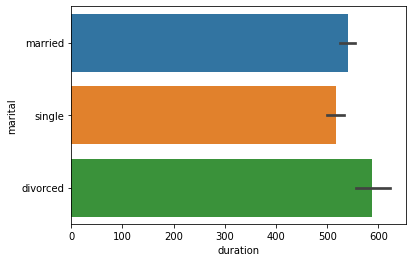

In [ ]:
sns.barplot(disseram_sim2.duration,disseram_sim2.marital)

In [ ]:
cols = bank_data.columns #todas colunas do dataframe
num_cols= bank_data._get_numeric_data().columns #somente colunas numérias
cat_cols = list(set(cols) - set(num_cols)) #colunas com informações não numéricas

In [ ]:
cols

Index(['age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'tem_credito', 'emprestimo_hab',
       'possui_emprestimo', 'assinou_contrato'],
      dtype='object')

In [ ]:
num_cols

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'tem_credito', 'emprestimo_hab', 'possui_emprestimo',
       'assinou_contrato'],
      dtype='object')

In [ ]:
cat_cols

['education', 'poutcome', 'marital', 'job']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


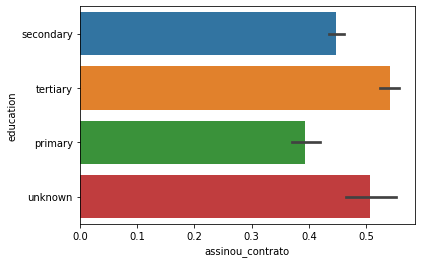

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


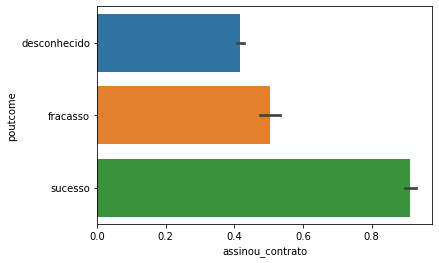

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


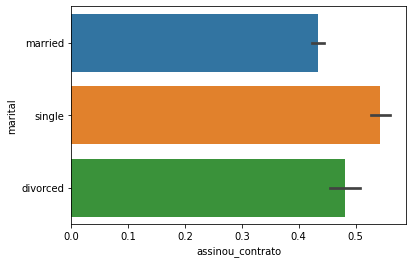

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


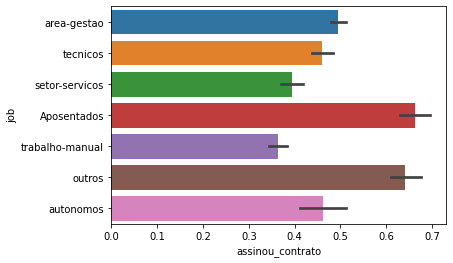

In [ ]:
#laço de repetição pra gerar os gráficos valores não numéricos
for i in bank_data[cat_cols]:
    sns.barplot(bank_data.assinou_contrato,bank_data[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


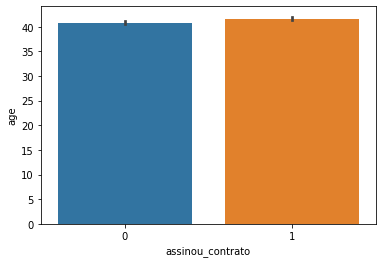

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


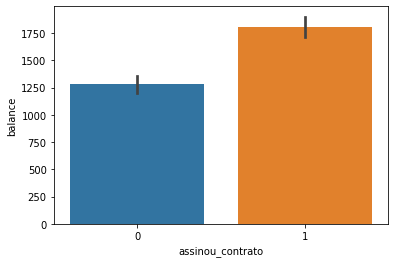

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


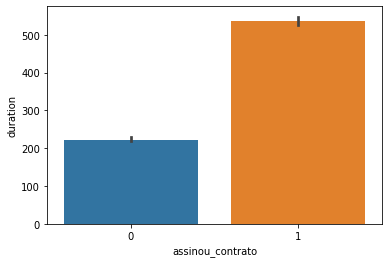

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


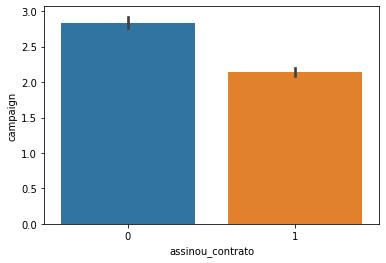

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


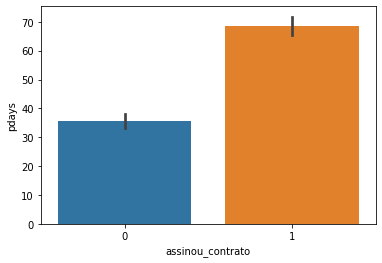

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


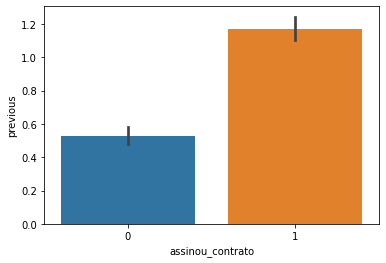

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


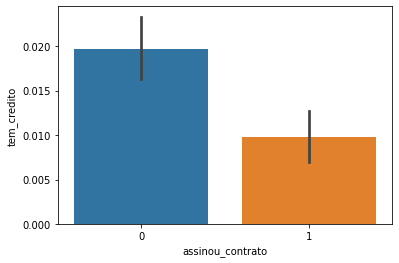

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


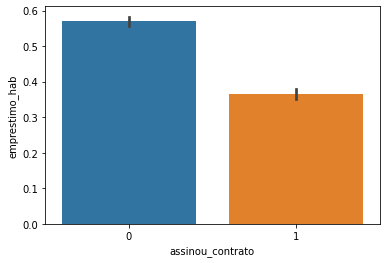

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


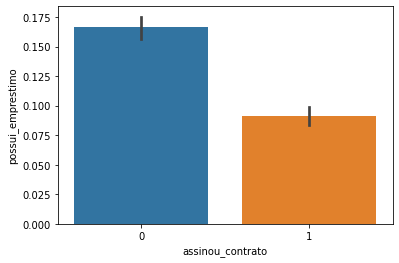

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


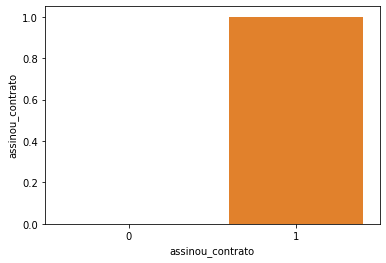

In [ ]:
#laço de repetição pra gerar os gráficos valores numéricos
for i in bank_data[num_cols]:
    sns.barplot(bank_data.assinou_contrato,bank_data[i])
    plt.show()

In [ ]:
bank_data

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,tem_credito,emprestimo_hab,possui_emprestimo,assinou_contrato
0,59,area-gestao,married,secondary,2343,1042,1,-1,0,desconhecido,0,1,0,1
1,56,area-gestao,married,secondary,45,1467,1,-1,0,desconhecido,0,0,0,1
2,41,tecnicos,married,secondary,1270,1389,1,-1,0,desconhecido,0,1,0,1
3,55,setor-servicos,married,secondary,2476,579,1,-1,0,desconhecido,0,1,0,1
4,54,area-gestao,married,tertiary,184,673,2,-1,0,desconhecido,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,trabalho-manual,single,primary,1,257,1,-1,0,desconhecido,0,1,0,0
11158,39,setor-servicos,married,secondary,733,83,4,-1,0,desconhecido,0,0,0,0
11159,32,tecnicos,single,secondary,29,156,2,-1,0,desconhecido,0,0,0,0
11160,43,tecnicos,married,secondary,0,9,2,172,5,fracasso,0,0,1,0


# Estratégia para identificar se o cliente foi contatado recentemente

In [ ]:
#entendendo quantos cliente não foram contatados anteriormente, ou seja aqueles que tem pdays -1

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [ ]:
# Mapeie padys = -1 para um valor grande (10000 é usado) para indicar que ele está tão longe no passado que não tem efeito
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Create a new column: contato recente
bank_data['contato_recente'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,tem_credito,emprestimo_hab,possui_emprestimo,assinou_contrato,contato_recente
11157,33,trabalho-manual,single,primary,1,257,1,0,desconhecido,0,1,0,0,0.000100
11158,39,setor-servicos,married,secondary,733,83,4,0,desconhecido,0,0,0,0,0.000100
11159,32,tecnicos,single,secondary,29,156,2,0,desconhecido,0,0,0,0,0.000100
11160,43,tecnicos,married,secondary,0,9,2,5,fracasso,0,0,1,0,0.005814
11161,34,tecnicos,married,secondary,0,628,1,0,desconhecido,0,0,0,0,0.000100


In [ ]:
# transforma todos os itens que eram texto em categorias usando 0 para não e 1 para sim
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,tem_credito,emprestimo_hab,possui_emprestimo,assinou_contrato,contato_recente,job_Aposentados,job_area-gestao,job_autonomos,job_outros,job_setor-servicos,job_tecnicos,job_trabalho-manual,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_desconhecido,poutcome_fracasso,poutcome_sucesso
0,59,2343,1042,1,0,0,1,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,56,45,1467,1,0,0,0,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,41,1270,1389,1,0,0,1,0,1,0.0001,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,55,2476,579,1,0,0,1,0,1,0.0001,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,54,184,673,2,0,0,0,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
bank_with_dummies.shape

(11162, 27)

# Agora nossos dados estarão preparados para o próximo processo de Previsão, ou seja, para que tipos de clientes ligar.

# CLASSIFICAÇÃO - MACHINE LEARN

Machine Learning (ou aprendizado de máquina) é uma inteligência artificial que permite que computadores **tomem decisões com a ajuda de algoritmos**. Esses algoritmos **reconhecem padrões** e se tornam capazes de **fazer predições**. De forma bem simples, o Machine Learning se baseia na construção e no uso de algoritmos que “aprendem” a partir dos dados.

A Classificação baseia-se em prever a categoria de uma observação dada. Aqui, procura-se estimar um “classificador” que gere como saída a classificação qualitativa de um dado não observado com base em dados de entrada (que abrangem observações com classificações já definidas).

In [82]:
list(bank_with_dummies)

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'tem_credito',
 'emprestimo_hab',
 'possui_emprestimo',
 'assinou_contrato',
 'contato_recente',
 'job_Aposentados',
 'job_area-gestao',
 'job_autonomos',
 'job_outros',
 'job_setor-servicos',
 'job_tecnicos',
 'job_trabalho-manual',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_desconhecido',
 'poutcome_fracasso',
 'poutcome_sucesso']

## Separando os dados para Gerar um classificador do Tipo Árvore de Decisão

In [83]:
x = bank_with_dummies[['age', 'balance', 'duration', 'campaign', 'previous', 'tem_credito', 'emprestimo_hab',
 'possui_emprestimo',  'contato_recente', 'job_Aposentados', 'job_autonomos', 'job_outros', 'job_area-gestao', 'job_setor-servicos',
 'job_tecnicos', 'job_trabalho-manual', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary',
 'education_tertiary', 'education_unknown', 'poutcome_desconhecido', 'poutcome_fracasso', 'poutcome_sucesso']].values
y = bank_with_dummies.assinou_contrato.values

In [84]:
x.shape

(11162, 26)

In [85]:
## Separação de X e y em conjuntos d etreinamento e teste
# Neste caso foi separado 25% da base para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [183]:
#clf será nosso modelo, com algoritmo que faz as previsões
clf = tree.DecisionTreeClassifier(max_depth=5)

In [184]:
#treinando o modelo com os dados separados de Treino, os 75%
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [185]:
#acurácia dos acertos dos dados de treino
clf.score(x_train, y_train)

0.7905865487994266

In [186]:
#Testando a acurárica dos acertos com os 25% de teste
clf.score(x_test, y_test)

0.8029380150483698

In [187]:
predict = clf.predict(x_test)

In [188]:
confusion_matrix(y_test,predict)

array([[1072,  361],
       [ 189, 1169]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


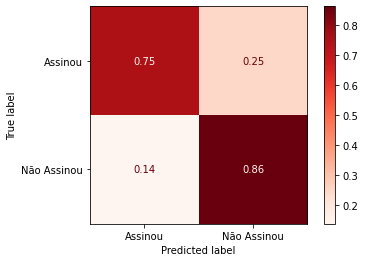

In [189]:
plot_confusion_matrix(clf, x_test,y_test, cmap=plt.cm.Reds,normalize='true', display_labels=['Assinou','Não Assinou'])

In [190]:
bank_with_dummies.head()

,age,balance,duration,campaign,previous,tem_credito,emprestimo_hab,possui_emprestimo,assinou_contrato,contato_recente,job_Aposentados,job_area-gestao,job_autonomos,job_outros,job_setor-servicos,job_tecnicos,job_trabalho-manual,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_desconhecido,poutcome_fracasso,poutcome_sucesso
0,59,2343,1042,1,0,0,1,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,56,45,1467,1,0,0,0,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,41,1270,1389,1,0,0,1,0,1,0.0001,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,55,2476,579,1,0,0,1,0,1,0.0001,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,54,184,673,2,0,0,0,0,1,0.0001,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [195]:
#fazendo novas previsões com o Modelo
'''x = bank_with_dummies[['age', 'balance', 'duration', 'campaign', 'previous', 'tem_credito', 'emprestimo_hab',
 'possui_emprestimo',  'contato_recente', 'job_Aposentados', 'job_autonomos', 'job_outros', 'job_area-gestao', 'job_setor-servicos',
 'job_tecnicos', 'job_trabalho-manual', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary',
 'education_tertiary', 'education_unknown', 'poutcome_desconhecido', 'poutcome_fracasso', 'poutcome_sucesso']].values'''
novox = np.array([[20,500,90,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0]])

In [196]:
previsao = clf.predict(novox)

In [197]:
previsao

array([0])

In [198]:
#cliente tem a probabilidade de X% apenas de assianar a carta de crédito(lado direito é a classe assina)
possibilidade = clf.predict_proba(novox)
possibilidade

array([[0.91522158, 0.08477842]])